In [1]:
# SEHS4696 Machine Learning for Data Mining
# Group Project
# Topic: The Future Rent of Private Offices in Hong Kong

# author: SEHS4696 MACHINE LEARNING FOR DATA MINING (Group 5)
# Student names and numbers: 22053502S LUI Wing Ho
#                            22059069S HO Man Kit
#                            22059727S FUNG Ho Wai
#                            22059790S CHEN Yuanhang
#                            22060542S CHAN Ka Lok

In [2]:
# reference list
# https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python
# https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting/notebook
# https://www.kaggle.com/code/robikscube/time-series-forecasting-with-machine-learning-yt

In [3]:
# import the necessary package
# import statements here
import pandas as pd
import numpy as np
!pip install pmdarima
import pmdarima as pm
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# ** 1. Load and Understand the Data
# Load the dataset into a dataframe called df
df = pd.read_csv('2.1M.csv', header=1)

# Check the dataset infomation
print(df.head())
print(df.info())

     Month Grade A Sheung Wan Grade A Sheung Wan - Remarks  Grade A Central  \
0  01-1999                247                            X              470   
1  02-1999                289                            X              424   
2  03-1999                317                            X              414   
3  04-1999                265                            X              405   
4  05-1999                256                          NaN              403   

  Grade A Central - Remarks  Grade A Wan Chai / Causeway Bay  \
0                       NaN                              337   
1                       NaN                              340   
2                       NaN                              335   
3                       NaN                              300   
4                       NaN                              290   

  Grade A Wan Chai / Causeway Bay - Remarks Grade A North Point / Quarry Bay  \
0                                       NaN                 

In [5]:
# ** 2. Data Preprocessing
# -- 2.1 Drop Unnecessary Features
df.drop('Grade A Sheung Wan - Remarks',axis=1,inplace=True)
df.drop('Grade A Central - Remarks',axis=1,inplace=True)
df.drop('Grade A Wan Chai / Causeway Bay - Remarks',axis=1,inplace=True)
df.drop('Grade A North Point / Quarry Bay - Remarks',axis=1,inplace=True)
df.drop('Grade A Tsim Sha Tsui - Remarks',axis=1,inplace=True)
df.drop('Grade A Yau Ma Tei / Mong Kok - Remarks',axis=1,inplace=True)
df.drop('Grade A Kowloon Bay / Kwun Tong - Remarks',axis=1,inplace=True)

df.drop('Grade B Sheung Wan - Remarks',axis=1,inplace=True)
df.drop('Grade B Central - Remarks',axis=1,inplace=True)
df.drop('Grade B Wan Chai / Causeway Bay - Remarks',axis=1,inplace=True)
df.drop('Grade B North Point / Quarry Bay - Remarks',axis=1,inplace=True)
df.drop('Grade B Tsim Sha Tsui - Remarks',axis=1,inplace=True)
df.drop('Grade B Yau Ma Tei / Mong Kok - Remarks',axis=1,inplace=True)
df.drop('Grade B Kowloon Bay / Kwun Tong - Remarks',axis=1,inplace=True)

df.drop('Grade C Sheung Wan - Remarks',axis=1,inplace=True)
df.drop('Grade C Central - Remarks',axis=1,inplace=True)
df.drop('Grade C Wan Chai / Causeway Bay - Remarks',axis=1,inplace=True)
df.drop('Grade C North Point / Quarry Bay - Remarks',axis=1,inplace=True)
df.drop('Grade C Tsim Sha Tsui - Remarks',axis=1,inplace=True)
df.drop('Grade C Yau Ma Tei / Mong Kok - Remarks',axis=1,inplace=True)
df.drop('Grade C Kowloon Bay / Kwun Tong - Remarks',axis=1,inplace=True)

# -- 2.2 Encode strings into numbers
# These District may not have private office in the first few years, then we change the n/a to 0.
df['Grade A Kowloon Bay / Kwun Tong'] = df['Grade A Kowloon Bay / Kwun Tong'].replace(np.nan, 0)
df['Grade B Kowloon Bay / Kwun Tong'] = df['Grade B Kowloon Bay / Kwun Tong'].replace(np.nan, 0)
df['Grade C Kowloon Bay / Kwun Tong'] = df['Grade C Kowloon Bay / Kwun Tong'].replace(np.nan, 0)
# Some data are missing, change the string into null to proccess missing data.
df = df.replace('-',None)

# -- 2.3 Handle missing data, if any
missing_data = df.isnull().sum()
print(missing_data)

if missing_data.any():
    columns_to_impute = ['Grade A Sheung Wan', 'Grade A Central', 'Grade A Wan Chai / Causeway Bay', 'Grade A North Point / Quarry Bay', 'Grade A Tsim Sha Tsui', 'Grade A Yau Ma Tei / Mong Kok', 'Grade A Kowloon Bay / Kwun Tong','Grade B Sheung Wan', 'Grade B Central', 'Grade B Wan Chai / Causeway Bay', 'Grade B North Point / Quarry Bay', 'Grade B Tsim Sha Tsui', 'Grade B Yau Ma Tei / Mong Kok', 'Grade B Kowloon Bay / Kwun Tong', 'Grade C Sheung Wan', 'Grade C Central', 'Grade C Wan Chai / Causeway Bay', 'Grade C North Point / Quarry Bay', 'Grade C Tsim Sha Tsui', 'Grade C Yau Ma Tei / Mong Kok', 'Grade C Kowloon Bay / Kwun Tong']
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    df[columns_to_impute] = pd.DataFrame(imputer.fit_transform(df[columns_to_impute]))

Month                                0
Grade A Sheung Wan                   2
Grade A Central                      0
Grade A Wan Chai / Causeway Bay      0
Grade A North Point / Quarry Bay     1
Grade A Tsim Sha Tsui                0
Grade A Yau Ma Tei / Mong Kok       42
Grade A Kowloon Bay / Kwun Tong      0
Grade B Sheung Wan                   0
Grade B Central                      0
Grade B Wan Chai / Causeway Bay      0
Grade B North Point / Quarry Bay     0
Grade B Tsim Sha Tsui                0
Grade B Yau Ma Tei / Mong Kok        0
Grade B Kowloon Bay / Kwun Tong      2
Grade C Sheung Wan                   0
Grade C Central                      0
Grade C Wan Chai / Causeway Bay      0
Grade C North Point / Quarry Bay     0
Grade C Tsim Sha Tsui                0
Grade C Yau Ma Tei / Mong Kok        0
Grade C Kowloon Bay / Kwun Tong     85
dtype: int64


In [6]:
# -- 2.4 Check the updated data again
# Check there is no misssing data
missing_data = df.isnull().sum()
print(missing_data)
# Updates a Clear dataset
print(df.info())
print(df)

Month                               0
Grade A Sheung Wan                  0
Grade A Central                     0
Grade A Wan Chai / Causeway Bay     0
Grade A North Point / Quarry Bay    0
Grade A Tsim Sha Tsui               0
Grade A Yau Ma Tei / Mong Kok       0
Grade A Kowloon Bay / Kwun Tong     0
Grade B Sheung Wan                  0
Grade B Central                     0
Grade B Wan Chai / Causeway Bay     0
Grade B North Point / Quarry Bay    0
Grade B Tsim Sha Tsui               0
Grade B Yau Ma Tei / Mong Kok       0
Grade B Kowloon Bay / Kwun Tong     0
Grade C Sheung Wan                  0
Grade C Central                     0
Grade C Wan Chai / Causeway Bay     0
Grade C North Point / Quarry Bay    0
Grade C Tsim Sha Tsui               0
Grade C Yau Ma Tei / Mong Kok       0
Grade C Kowloon Bay / Kwun Tong     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 22 columns):
 #   Column                            Non-Nul

In [7]:
# -- 2.5 train_test_split
# Fit the train data
X = df['Grade A Central']
y = df['Grade C Central']
X = np.array(X).reshape(-1, 1)
# Split the dataset (Take 80% as train and 20% as test)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state = 42 )
print(x_train)
print(Y_train)

[[1043.]
 [ 710.]
 [ 973.]
 [ 348.]
 [ 933.]
 [ 264.]
 [ 571.]
 [ 381.]
 [1042.]
 [ 476.]
 [ 424.]
 [1044.]
 [ 245.]
 [1389.]
 [1029.]
 [ 700.]
 [1302.]
 [1033.]
 [1073.]
 [ 998.]
 [1134.]
 [ 467.]
 [ 286.]
 [1082.]
 [1147.]
 [ 947.]
 [ 430.]
 [ 899.]
 [ 483.]
 [ 972.]
 [1005.]
 [ 351.]
 [ 411.]
 [ 391.]
 [1039.]
 [1017.]
 [ 314.]
 [1157.]
 [ 364.]
 [ 397.]
 [ 667.]
 [1025.]
 [1078.]
 [ 305.]
 [1249.]
 [ 315.]
 [ 461.]
 [1033.]
 [1143.]
 [1176.]
 [ 863.]
 [ 440.]
 [1001.]
 [ 660.]
 [1320.]
 [1035.]
 [ 515.]
 [1419.]
 [ 898.]
 [ 974.]
 [1222.]
 [ 794.]
 [ 791.]
 [1075.]
 [ 261.]
 [ 898.]
 [1000.]
 [1332.]
 [ 339.]
 [ 926.]
 [1330.]
 [1159.]
 [ 940.]
 [1010.]
 [ 987.]
 [1104.]
 [1064.]
 [1055.]
 [1015.]
 [1033.]
 [ 414.]
 [ 997.]
 [1382.]
 [ 950.]
 [ 799.]
 [1241.]
 [1065.]
 [ 699.]
 [ 339.]
 [ 506.]
 [ 485.]
 [1445.]
 [ 815.]
 [1184.]
 [1092.]
 [1249.]
 [1007.]
 [1180.]
 [ 297.]
 [1105.]
 [ 506.]
 [1079.]
 [1120.]
 [ 377.]
 [ 389.]
 [ 477.]
 [ 769.]
 [ 996.]
 [ 739.]
 [ 955.]
 [ 280.]
 

In [8]:
# ** 3. Linear Regression
# Create linear regression model
model = LinearRegression()
model.fit(x_train,Y_train)

# Predicting rent for the test set
Y_pred = model.predict(x_test)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 3305.1298436432235
R-squared: 0.8739836045302373
Coefficients: [0.46895714]
Intercept: 42.76970776137273


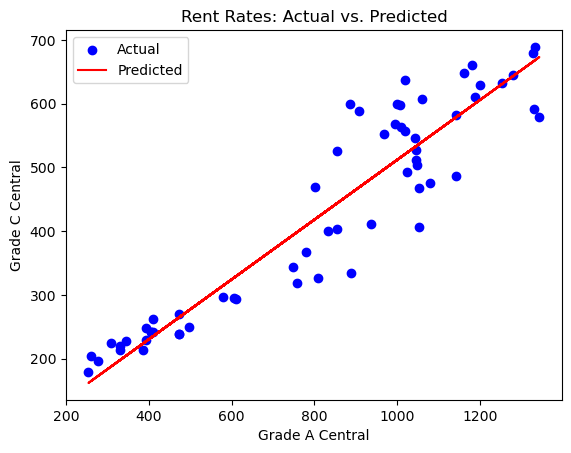

In [9]:
# Visualize the results
plt.scatter(x_test, Y_test, color='blue', label='Actual')
plt.plot(x_test, Y_pred, color='red', label='Predicted')
plt.xlabel('Grade A Central')
plt.ylabel('Grade C Central')
plt.title('Rent Rates: Actual vs. Predicted')
plt.legend()
plt.show()

In [10]:
# ** 4. Times series ( a series of data points recorded at different time intervals
# ** Preperation of Times series
# Restore the Index to be Month
df = df.set_index('Month')
#df.index = pd.to_datetime(df.index, format="%b-%y")
df.index = pd.to_datetime(df.index)


In [11]:
#Prepare columns for compare the price of 2 place
col = 'Grade A Central'
col2 = 'Grade A Wan Chai / Causeway Bay'
df = df[[col, col2]]
print(df)

            Grade A Central  Grade A Wan Chai / Causeway Bay
Month                                                       
1999-01-01            470.0                            337.0
1999-02-01            424.0                            340.0
1999-03-01            414.0                            335.0
1999-04-01            405.0                            300.0
1999-05-01            403.0                            290.0
...                     ...                              ...
2023-09-01           1043.0                            652.0
2023-10-01           1004.0                            616.0
2023-11-01           1017.0                            556.0
2023-12-01            956.0                            654.0
2024-01-01            899.0                            658.0

[301 rows x 2 columns]


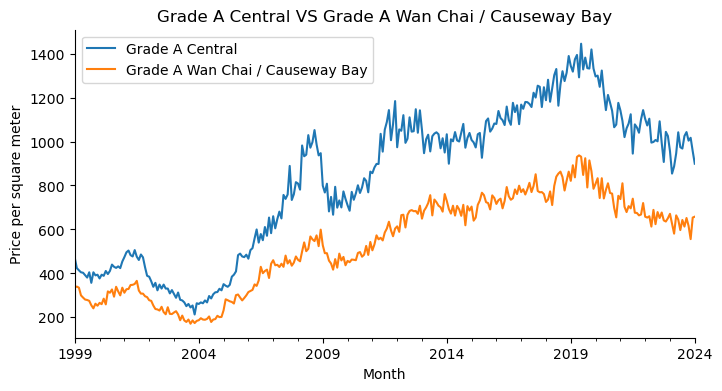

In [12]:
# A basic graph to show the data
df[col].plot(kind='line', figsize=(8, 4), label=col)
df[col2].plot(kind='line', figsize=(8, 4), label=col2)
plt.ylabel('Price per square meter')
plt.title(col + ' VS ' + col2)
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
# Prepare column for time series data 
df = df[[col]]
print(df)

            Grade A Central
Month                      
1999-01-01            470.0
1999-02-01            424.0
1999-03-01            414.0
1999-04-01            405.0
1999-05-01            403.0
...                     ...
2023-09-01           1043.0
2023-10-01           1004.0
2023-11-01           1017.0
2023-12-01            956.0
2024-01-01            899.0

[301 rows x 1 columns]


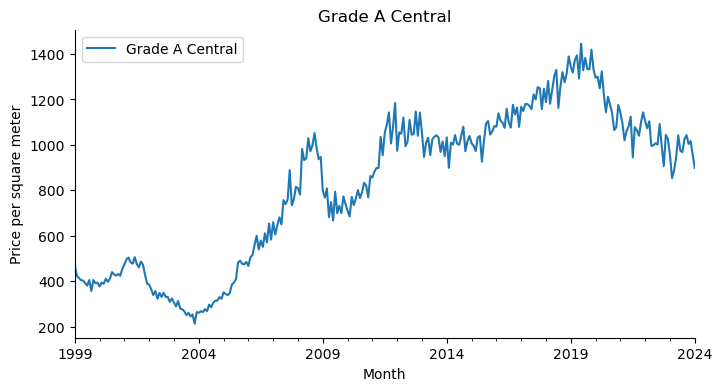

In [14]:
# A basic graph to show the data
df[col].plot(kind='line', figsize=(8, 4), label=col)
plt.ylabel('Price per square meter')
plt.title(col)
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
# ** 5. AutoSARIMA model
model = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3641.242, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3299.244, Time=0.42 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3503.501, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3648.374, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=3362.605, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=3240.462, Time=1.03 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=3636.732, Time=0.79 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=3183.913, Time=1.72 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=3240.674, Time=0.52 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.89 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  301
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -1580.894
Date:                            Wed, 01 May 2024   AIC                           3173.787
Time:                                    21:42:45   BIC                           3195.786
Sample:                                01-01-1999   HQIC                          3182.602
                                     - 01-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4491      0.057      7.852      0.000       0.337       0.561
ar.L2          0.3308      0.061      5.413      0.000       0.211       0.451
ar.L3          0.1870      0.056      3.345      0.001       0.077       0.297
ar.S.L12      -0.7183      0.058    -12.390      0.000      -0.832      -0.605
ar.S.L24      -0.4328      0.056     -7.697      0.000      -0.543      -0.323
sigma2      3186.2965    231.487     13.764      0.000    2732.591    3640.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.61
Prob(Q):                              0.98   Prob(JB):                         0.06
Heteroskedasticity (H):               3.11   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

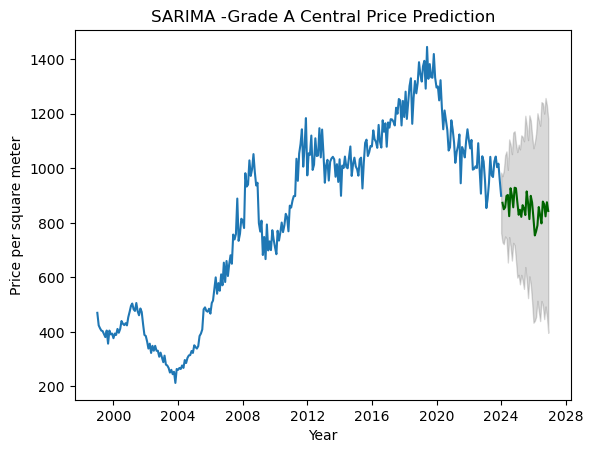

In [16]:
# Forecast
n_periods = 36
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot the graph
plt.plot(df)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title('SARIMA -'+ col +' Price Prediction')
plt.xlabel('Year')
plt.ylabel('Price per square meter')
plt.show()


In [19]:
#Check the predict result
date = '2024-03-01'
print(fitted_series)
print(date + ' predicted price is $'+"{:.0f}".format(fitted_series.loc[date]))

2024-01-01           NaN
2024-02-01    873.450114
2024-03-01    849.739433
2024-04-01    856.747813
2024-05-01    898.881140
2024-06-01    902.144788
2024-07-01    824.372383
2024-08-01    926.796988
2024-09-01    900.428409
2024-10-01    856.896466
2024-11-01    928.674572
2024-12-01    926.783872
2025-01-01    876.215343
2025-02-01    829.357072
2025-03-01    847.920161
2025-04-01    821.927190
2025-05-01    864.818035
2025-06-01    852.480342
2025-07-01    828.487317
2025-08-01    915.176189
2025-09-01    872.616006
2025-10-01    813.663654
2025-11-01    898.939583
2025-12-01    874.782182
2026-01-01    816.378844
2026-02-01    753.682152
2026-03-01    768.324203
2026-04-01    790.403923
2026-05-01    857.892916
2026-06-01    827.716748
2026-07-01    797.913826
2026-08-01    877.974697
2026-09-01    867.940466
2026-10-01    823.687453
2026-11-01    875.459228
2026-12-01    843.313840
Freq: MS, dtype: float64
2024-03-01 predicted price is $850
